In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import plotting
import datageneration

<p> Introduction</p>
<p>
SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems. They were very famous around the time they were created, during the 1990s, and keep on being the go-to method for a high-performing algorithm with a little tuning.</p>

</br>

<p>It is a supervised machine learning problem where we try to find a hyperplane that best separates the two classes. Note: Don’t get confused between SVM and logistic regression. Both the algorithms try to find the best hyperplane, but the main difference is logistic regression is a probabilistic approach whereas support vector machine is based on statistical approaches.</p>

<p>Well, SVM does this by finding the maximum margin between the hyperplanes that means maximum distances between the two classes</p>

<p>The smaller C is, the stronger the regularization. Accordingly, the model will attempt to maximize the margin and be more tolerant towards misclassifications.</p>
<p>If we set C to a large number, then the SVM will pursue outliers more aggressively, which potentially comes at the cost of a smaller margin and may lead to overfitting on the training data. The classifier might be less robust on unseen data</p>

<center><img src="mirgin_hinge.png" alt="Girl in a jacket" width="600" height="600"></center>

In [292]:
class SVM:

    def __init__(self, C = 1.0,kernel=None):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0
        self.kernel = kernel

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        #reg = 0.5 * (w* w)
        reg = np.min(np.linalg.norm(w, keepdims=True)**2/2,keepdims=True)
        #reg = 2/(w + 10e-7)
        #reg = 1/(w + 10e-7)
        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            # calculating loss
            loss = reg  + self.C * max(0, 1 - opt_term)
            #loss = reg - self.C * min(0,opt_term - 1) # MIT 6.034 AI,2010 
        return loss[0][0]

    def transform_poly(self, X, Y=None):
        # Finding the Square of X1, X2
            X['x1^2'] = X['x1'] ** 2
            X['x2^2'] = X['x2'] ** 2
            # Finding the product of X1 and X2
            X['x1 * x2'] = X['x1'] * X['x2']
            # Converting dataset to numpy array
            X = X.to_numpy()
            if Y.size != 0:
                Y = Y.to_numpy()
                return X, Y
            else:
                return X

    def fit(self, X, Y, batch_size=32, learning_rate=0.0001, epochs=100):

        if(self.kernel == "poly"):
            print("SVM(kernel='poly')")
            X, Y = self.transform_poly(X, Y)
        else:
            X = X.to_numpy()
            Y = Y.to_numpy()
        # The number of features in X
        number_of_features = X.shape[1]
        # The number of Samples in X
        number_of_samples = X.shape[0]
        c = self.C
        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)
        # Shuffling the samples randomly
        np.random.shuffle(ids)
        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses
            print('Epoch:',i+1,' Train Loss:',l)
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                dw = 0
                db = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b) 

                        if ti >= 1:
                            dw += 0
                            db += 0
                        else:
                            # Calculating the gradients
                            dw += w - c *Y[x] * X[x]
                            db += c * Y[x]
                            
                            

                # Updating weights and bias
                # w = w - learning_rate * w +  learning_rate * dw #
                # b = b - learning_rate * db
                w = w -  learning_rate * dw 
                b = b - learning_rate * db
                
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):

        prediction = np.dot(X, self.w[0]) + self.b 
        return np.sign(prediction) # if <0 :-1 if >0 :1 else 0

In [293]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [294]:
# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 500, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=42
    )

# Classes 1 and -1
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [295]:
lag_cons = 1
svm = SVM(lag_cons)
w, b, losses = svm.fit(X_train, y_train)

Epoch: 1  Train Loss: 1.0
Epoch: 2  Train Loss: 0.01204296790204749
Epoch: 3  Train Loss: 0.02505888363630783
Epoch: 4  Train Loss: 0.036695989237951365
Epoch: 5  Train Loss: 0.04393565287325717
Epoch: 6  Train Loss: 0.04925431871798677
Epoch: 7  Train Loss: 0.053290960567114576
Epoch: 8  Train Loss: 0.05681333277104137
Epoch: 9  Train Loss: 0.0597822046959708
Epoch: 10  Train Loss: 0.062454725187394616
Epoch: 11  Train Loss: 0.06489448578236999
Epoch: 12  Train Loss: 0.06718755860188974
Epoch: 13  Train Loss: 0.06906791224090754
Epoch: 14  Train Loss: 0.07088860082215993
Epoch: 15  Train Loss: 0.07263836048730199
Epoch: 16  Train Loss: 0.07431519138828226
Epoch: 17  Train Loss: 0.07591528425381655
Epoch: 18  Train Loss: 0.0775292900290395
Epoch: 19  Train Loss: 0.07898733212565667
Epoch: 20  Train Loss: 0.08044435368494507
Epoch: 21  Train Loss: 0.08156014540475882
Epoch: 22  Train Loss: 0.08268179534698226
Epoch: 23  Train Loss: 0.08380926724047075
Epoch: 24  Train Loss: 0.0848528009

In [296]:
prediction = svm.predict(X_test)
# Loss value
lss = losses.pop()
print("Loss:", lss)
# print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])


Loss: 0.13085334268736143
Accuracy: 1.0
w, b: [array([[ 0.50122726, -0.10635734]]), -0.09420000000000096]


In [297]:
def misclassification_rate(labels, predictions):
    total = len(labels)
    errors = sum(labels != predictions)
    return errors/total*100
misclassification_rate( y_test,prediction)

0.0

In [298]:
print('margin:',2/ np.linalg.norm(svm.w))

margin: 3.903298099689205


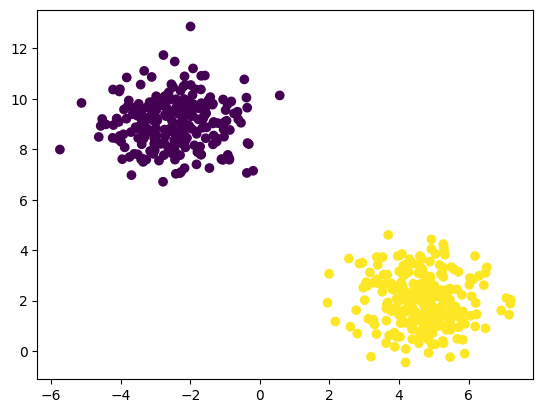

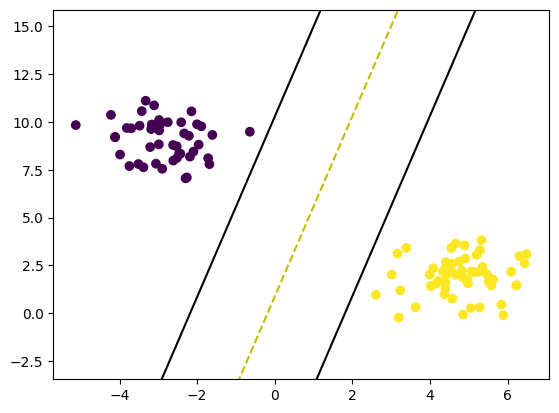

In [299]:
#Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)
    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset()
visualize_svm()

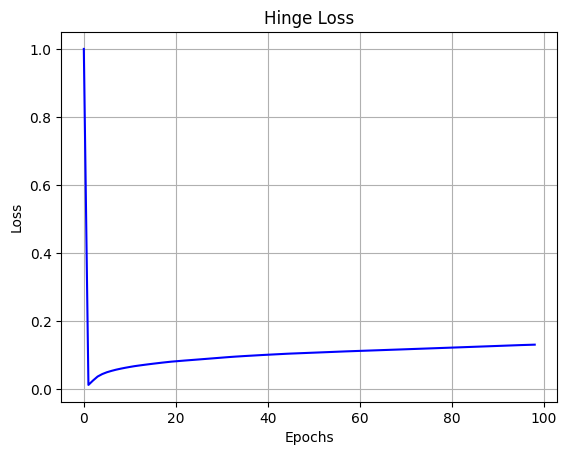

In [300]:
plt.plot(losses, 'blue')
plt.grid()
plt.title("Hinge Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

<center><img src="svm.png" alt="Girl in a jacket" width="800" height="600"></center>
<p> If someone asks you which is a better model, the one where the margin is maximum and has 2 misclassified points or the one where the margin is very less, and all the points are correctly classified?
Well, there’s no correct answer to this question, but rather we can use SVM Error = Margin Error + Classification Error to justify this. If you don’t want any misclassification in the model then you can choose figure 2. That means we’ll increase ‘c’ to decrease Classification Error but if you want that your margin should be maximized then the value of ‘c’ should be minimized. That’s why ‘c’ is a hyperparameter and we find the optimal value of ‘c’ using GridsearchCV and cross-validation.</p>

In [5]:
import numpy as np 

class svm:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [6]:
clf = svm()
clf.fit(X_train, y_train)

In [7]:
prediction = clf.predict(X_test)

print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [clf.w, clf.b])

Prediction: [-1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1.
 -1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.
 -1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.
  1.  1. -1.  1. -1.  1.]
Accuracy: 1.0
w, b: [array([ 0.56525435, -0.05662747]), 0.037000000000000026]


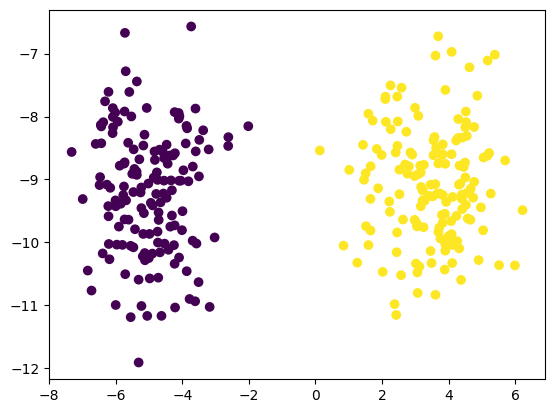

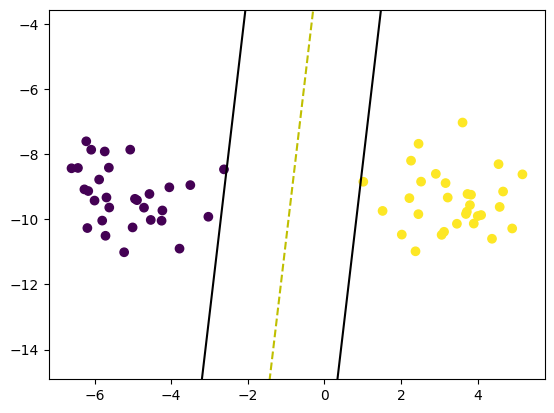

In [9]:
#Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    w = clf.w
    b = clf.b
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)
    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset()
visualize_svm()